In [1]:
import numpy as np
import polars as pl
import polars.selectors as cs
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import great_tables as tg
import altair as alt

In [2]:
two_blobs = pl.read_csv('../../DATA/cluster_two_blobs.csv')
two_blobs_outliers = pl.read_csv('../../DATA/cluster_two_blobs_outliers.csv')

In [3]:
two_blobs

X1,X2
f64,f64
0.046733,1.76512
-8.994134,-6.508186
0.650539,1.264533
-9.501554,-6.736493
0.05705,0.188215
…,…
-9.895227,-6.644544
-9.544007,-6.060362
0.713958,1.56046


In [4]:
two_blobs_outliers

X1,X2
f64,f64
0.046733,1.76512
-8.994134,-6.508186
0.650539,1.264533
-9.501554,-6.736493
0.05705,0.188215
…,…
0.954444,0.889178
-8.867767,-5.635758
-4.0,-2.0


In [11]:
fig = px.scatter(
    data_frame=two_blobs,
    x='X1',
    y='X2',
    title='Two Blobs Clustering'
)

fig.update_layout(
    xaxis_title='X1',
    yaxis_title='X2',
    width=900,
    height=700,
)

fig.show()


In [14]:
fig = px.scatter(
    data_frame=two_blobs_outliers,
    x='X1',
    y='X2',
    title='Two Blobs Clustering with Outliers'
).update_layout(
    width=900,
    height=700,
    xaxis_title='X1',
    yaxis_title='X2',
)

fig.show()

In [19]:
def display_categories(model: any, data: pl.DataFrame) -> None:
    labels = model.fit_predict(data)
    fig: go.Figure = px.scatter(
        data_frame=data,
        x='X1',
        y='X2',
        color=labels,
        color_discrete_sequence=px.colors.qualitative.Set1,
        labels={'color': 'Cluster'},
    ).update_layout(
        width=900,
        height=700,
        title=f'Clustered data with {model.__class__.__name__}'
    )

    fig.show()

In [20]:
from sklearn.cluster import DBSCAN

In [23]:
dbscan = DBSCAN()

In [24]:
display_categories(dbscan, two_blobs)

In [25]:
display_categories(dbscan, two_blobs_outliers)

In [26]:
dbscan = DBSCAN(eps=0.001)
display_categories(dbscan, two_blobs_outliers)

In [27]:
dbscan = DBSCAN(eps=10)
display_categories(dbscan, two_blobs_outliers)

In [28]:
dbscan = DBSCAN(eps=1)
display_categories(dbscan, two_blobs_outliers)

In [29]:
dbscan.labels_

array([ 0,  1,  0, ..., -1, -1, -1], shape=(1003,))

In [36]:
outliers_data = pl.DataFrame({
    'outliers': dbscan.labels_,
    'X1': two_blobs_outliers['X1'],
    'X2': two_blobs_outliers['X2'],
}).filter(
    pl.col('outliers') == -1
)

In [61]:
outlier_percent = []
number_of_outliers = []

for eps in np.linspace(0.001, 10, 100):
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(two_blobs_outliers)
    number_of_outliers.append(np.sum(dbscan.labels_ == -1))
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    outlier_percent.append(perc_outliers)

In [62]:
outlier_percent

[np.float64(100.0),
 np.float64(28.913260219341975),
 np.float64(5.982053838484546),
 np.float64(1.9940179461615155),
 np.float64(0.9970089730807578),
 np.float64(0.5982053838484547),
 np.float64(0.3988035892323031),
 np.float64(0.29910269192422734),
 np.float64(0.29910269192422734),
 np.float64(0.29910269192422734),
 np.float64(0.29910269192422734),
 np.float64(0.29910269192422734),
 np.float64(0.29910269192422734),
 np.float64(0.29910269192422734),
 np.float64(0.29910269192422734),
 np.float64(0.29910269192422734),
 np.float64(0.29910269192422734),
 np.float64(0.29910269192422734),
 np.float64(0.29910269192422734),
 np.float64(0.29910269192422734),
 np.float64(0.29910269192422734),
 np.float64(0.29910269192422734),
 np.float64(0.29910269192422734),
 np.float64(0.29910269192422734),
 np.float64(0.29910269192422734),
 np.float64(0.29910269192422734),
 np.float64(0.29910269192422734),
 np.float64(0.29910269192422734),
 np.float64(0.29910269192422734),
 np.float64(0.29910269192422734),
 

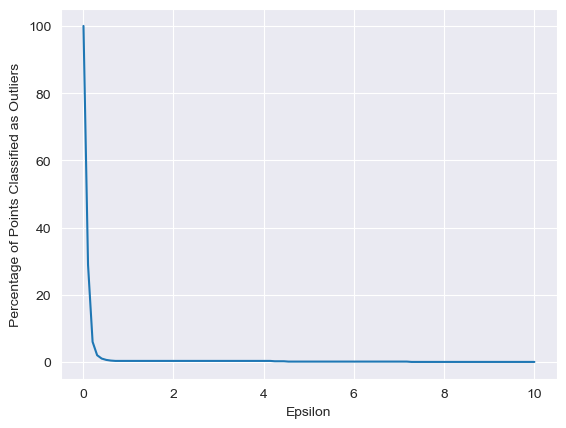

In [63]:
sns.lineplot(x=np.linspace(0.01, 10, 100), y=outlier_percent)
plt.xlabel("Epsilon")
plt.ylabel("Percentage of Points Classified as Outliers")
plt.show()

(0.0, 1.0)

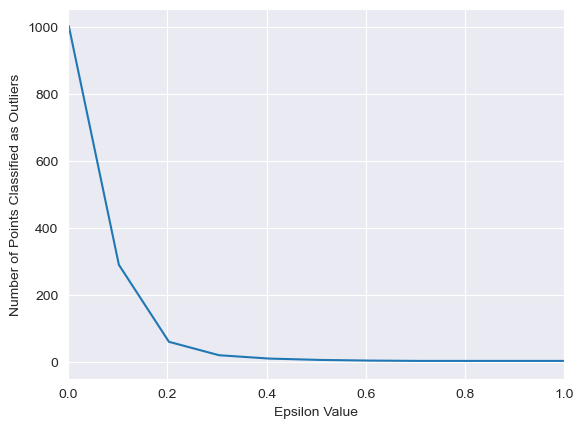

In [64]:
sns.lineplot(x=np.linspace(0.001,10,100),y=number_of_outliers)
plt.ylabel("Number of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.xlim(0,1)

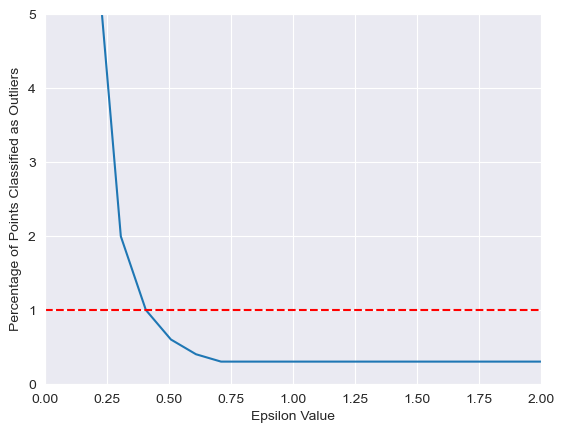

In [65]:
sns.lineplot(x=np.linspace(0.001,10,100),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.ylim(0,5)
plt.xlim(0,2)
plt.hlines(y=1,xmin=0,xmax=2,colors='red',ls='--')

In [66]:
dbscan = DBSCAN(eps=0.4)
display_categories(dbscan, two_blobs_outliers)

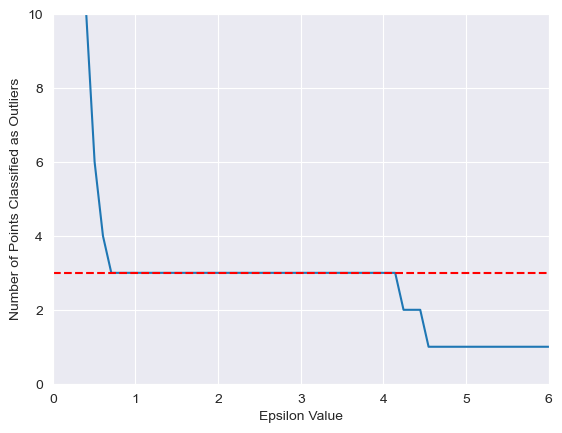

In [67]:
sns.lineplot(x=np.linspace(0.001,10,100),y=number_of_outliers)
plt.ylabel("Number of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.ylim(0,10)
plt.xlim(0,6)
plt.hlines(y=3,xmin=0,xmax=10,colors='red',ls='--')

In [68]:
dbscan = DBSCAN(eps=0.75)
display_categories(dbscan,two_blobs_outliers)

In [69]:
outlier_percent = []

for n in np.arange(1,100):

    dbscan = DBSCAN(min_samples=n)
    dbscan.fit(two_blobs_outliers)

    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)

    outlier_percent.append(perc_outliers)

Text(0.5, 0, 'Minimum Number of Samples')

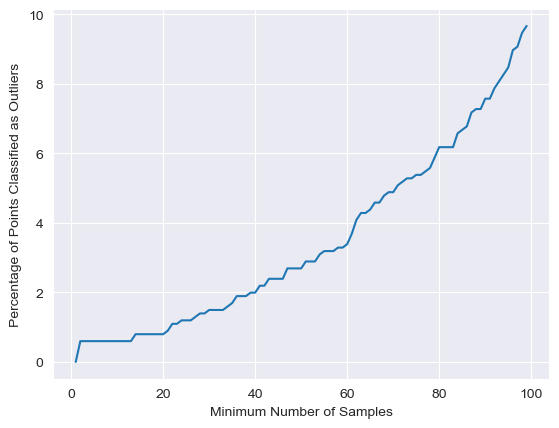

In [70]:
sns.lineplot(x=np.arange(1,100),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Minimum Number of Samples")

In [71]:
num_dim = two_blobs_outliers.shape[1]

dbscan = DBSCAN(min_samples=2*num_dim)
display_categories(dbscan,two_blobs_outliers)

In [72]:
num_dim = two_blobs_outliers.shape[1]

dbscan = DBSCAN(eps=0.75,min_samples=2*num_dim)
display_categories(dbscan,two_blobs_outliers)

In [73]:
dbscan = DBSCAN(min_samples=1)
display_categories(dbscan,two_blobs_outliers)

In [74]:
dbscan = DBSCAN(eps=0.75,min_samples=1)
display_categories(dbscan,two_blobs_outliers)